In [16]:
# import cv2
import numpy as np
import tensorflow as tf
import pandas as pd
from PIL import Image
import os
import math


In [2]:
interpreter = tf.lite.Interpreter(model_path = r'movenet.tflite')
interpreter.allocate_tensors()

Flipping Training Images

In [7]:


def flip_images(input_dir, output_dir):
    # Ensure the output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Loop through all the files in the input directory
    for filename in os.listdir(input_dir):
        # Construct the full file path
        img_path = os.path.join(input_dir, filename)
        
        # Check if the file is an image
        if os.path.isfile(img_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            # Open the image
            img = Image.open(img_path)
            
            # Flip the image horizontally
            flipped_img = img.transpose(Image.FLIP_LEFT_RIGHT)
            
            # Save the flipped image to the output directory
            flipped_img.save(os.path.join(output_dir, filename+'_flipped.jpg'))
            print(f"Flipped and saved: {filename}")

# Example usage:
input_directory = r'C:\Users\2001l\OneDrive\Desktop\squat\upPosition'
output_directory = r'C:\Users\2001l\OneDrive\Desktop\squat\upPosition'

flip_images(input_directory, output_directory)


Flipped and saved: 0_960x540.jpg
Flipped and saved: 0_960x540.jpg_flipped.jpg
Flipped and saved: 0_960x540.jpg_flipped.jpg_flipped.jpg
Flipped and saved: 0_960x540.jpg_flipped.jpg_flipped.jpg_flipped.jpg
Flipped and saved: 0_960x540.jpg_flipped.jpg_flipped.jpg_flipped.jpg_flipped.jpg
Flipped and saved: 0_960x540.jpg_flipped.jpg_flipped.jpg_flipped.jpg_flipped.jpg_flipped.jpg
Flipped and saved: 0_960x540.jpg_flipped.jpg_flipped.jpg_flipped.jpg_flipped.jpg_flipped.jpg_flipped.jpg
Flipped and saved: 0_960x540.jpg_flipped.jpg_flipped.jpg_flipped.jpg_flipped.jpg_flipped.jpg_flipped.jpg_flipped.jpg
Flipped and saved: 0_960x540.jpg_flipped.jpg_flipped.jpg_flipped.jpg_flipped.jpg_flipped.jpg_flipped.jpg_flipped.jpg_flipped.jpg
Flipped and saved: 0_960x540.jpg_flipped.jpg_flipped.jpg_flipped.jpg_flipped.jpg_flipped.jpg_flipped.jpg_flipped.jpg_flipped.jpg_flipped.jpg
Flipped and saved: 0_960x540.jpg_flipped.jpg_flipped.jpg_flipped.jpg_flipped.jpg_flipped.jpg_flipped.jpg_flipped.jpg_flipped.jpg_f

In [8]:
from PIL import Image
import os

Dataframe of landmarks of the training Images

In [9]:
def landmarks_from_standing_images(input_dir,X,Y):
    for file in os.listdir(input_dir):
        img_path = os.path.join(input_dir, file)
        
        # Check if the file is an image
        if os.path.isfile(img_path) and file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            img = Image.open(img_path)
            img = tf.image.resize_with_pad(np.expand_dims(img,axis=0), 192, 192)
            input_image = tf.cast(img, dtype=tf.float32)

            # Setup input and output
            input_details = interpreter.get_input_details()
            output_details = interpreter.get_output_details()

            #make predictions
            interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
            interpreter.invoke()
            keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
            landmarks = keypoints_with_scores
            print(keypoints_with_scores)
            X.append(landmarks)
            Y.append(0)
    return X,Y

def landmarks_from_squating_images(input_dir,X,Y):
    for file in os.listdir(input_dir):
        img_path = os.path.join(input_dir, file)
        
        # Check if the file is an image
        if os.path.isfile(img_path) and file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            img = Image.open(img_path)
            img = tf.image.resize_with_pad(np.expand_dims(img,axis=0), 192, 192)
            input_image = tf.cast(img, dtype=tf.float32)

            # Setup input and output
            input_details = interpreter.get_input_details()
            output_details = interpreter.get_output_details()

            #make predictions
            interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
            interpreter.invoke()
            keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
            print(keypoints_with_scores)
            landmarks = keypoints_with_scores

            X.append(landmarks)
            Y.append(1)
    return X,Y
            

In [31]:
X,Y = landmarks_from_standing_images(r'upPosition',[],[])

[[[[0.22297534 0.38723668 0.5534166 ]
   [0.20880449 0.4046455  0.63061035]
   [0.20965666 0.38626838 0.64509654]
   [0.21101205 0.4464192  0.64093244]
   [0.20824979 0.40135393 0.45873946]
   [0.26774096 0.49741763 0.66835505]
   [0.26909456 0.38469005 0.76928675]
   [0.37840682 0.6005491  0.6440853 ]
   [0.34979504 0.38863048 0.35157004]
   [0.29661572 0.5731057  0.50776696]
   [0.27267152 0.35962504 0.40477547]
   [0.49482056 0.51978004 0.7263056 ]
   [0.5016979  0.43753502 0.79078335]
   [0.6649892  0.54242486 0.71020615]
   [0.6681502  0.43372834 0.69985104]
   [0.83685815 0.5739925  0.82849884]
   [0.8091948  0.4354417  0.8023331 ]]]]
[[[[0.24158059 0.52396035 0.455881  ]
   [0.23205161 0.53992134 0.33511004]
   [0.23170164 0.51533496 0.41099513]
   [0.25196946 0.56543344 0.48564222]
   [0.2449438  0.5079971  0.70602417]
   [0.31533813 0.595647   0.7191638 ]
   [0.31631988 0.47339684 0.780107  ]
   [0.41609287 0.56128436 0.6333993 ]
   [0.41807187 0.4453773  0.79309916]
   [0.356

In [11]:
len(Y)

20

In [32]:
X,Y = landmarks_from_squating_images(r'downPosition',X,Y)

[[[[0.2837182  0.50263846 0.6581149 ]
   [0.27549648 0.50650334 0.69554234]
   [0.27562907 0.48632464 0.62205917]
   [0.28937882 0.49937636 0.41664067]
   [0.28896224 0.45475194 0.60171914]
   [0.34916624 0.5108118  0.4196647 ]
   [0.35752293 0.4281724  0.7638958 ]
   [0.44191658 0.49825662 0.30241045]
   [0.4599139  0.43275377 0.7035094 ]
   [0.4117667  0.57165444 0.37904665]
   [0.42394286 0.5093465  0.474743  ]
   [0.5284609  0.46874878 0.54398406]
   [0.5310453  0.43858978 0.71264607]
   [0.58319426 0.4355592  0.4550698 ]
   [0.5806234  0.5961023  0.59456325]
   [0.70165014 0.35538968 0.49402127]
   [0.692418   0.5714128  0.6455704 ]]]]
[[[[0.26091266 0.3748744  0.58580387]
   [0.23427974 0.3977509  0.57013154]
   [0.23764768 0.3671754  0.7943654 ]
   [0.23956358 0.45353994 0.76347065]
   [0.2407969  0.38430855 0.66151583]
   [0.30418503 0.52926105 0.7051477 ]
   [0.32896793 0.36904484 0.6961925 ]
   [0.2845286  0.55601907 0.5009128 ]
   [0.31923065 0.23515844 0.892555  ]
   [0.215

In [33]:

# Generate column names
columns = [f"{i}_x" for i in range(1, 18) if i in (7,6,13,12,15,14,17,16)] + [f"{i}_y" for i in range(1, 18) if i in (7,6,13,12,15,14,17,16)] + ['Y']

# Create an empty DataFrame with these columns
df = pd.DataFrame(columns=columns)

# Display the DataFrame to verify
print(df)

Empty DataFrame
Columns: [6_x, 7_x, 12_x, 13_x, 14_x, 15_x, 16_x, 17_x, 6_y, 7_y, 12_y, 13_y, 14_y, 15_y, 16_y, 17_y, Y]
Index: []


In [34]:
df = pd.DataFrame(columns=columns)

y = 0
for entry in X:
    new_row = {col: None for col in columns}
    x = 0
    for x in range(1,18):
        if x in (7,6,13,12,15,14,17,16):
            xName = str(x) + '_x'
            yName = str(x) + '_y'
            new_row[xName] = entry[0][0][x-1][0]
            new_row[yName] = entry[0][0][x-1][1]
        x = x+1
    new_row['Y'] = Y[y]
    y = y+1
    df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

C:\Users\2001l\AppData\Local\Temp\ipykernel_33168\923337779.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)


In [35]:
df_landmarks = df

In [36]:
df_landmarks.to_csv('squatTrainSet.csv', index = False)

In [40]:
df_landmarks = pd.read_csv('squatTrainSet.csv')

In [41]:
df_angles= pd.DataFrame(columns=['right_upper','left_upper','right_bottom','left_bottom','Y'])

In [42]:
df_landmarks.corr()

,6_x,7_x,12_x,13_x,14_x,15_x,16_x,17_x,6_y,7_y,12_y,13_y,14_y,15_y,16_y,17_y,Y
6_x,1.000000,0.972484,0.790848,0.780065,-0.681397,-0.681981,-0.530085,-0.649133,-0.040264,0.224371,0.018479,0.080928,0.049580,0.131242,-0.016969,0.287397,0.678202
7_x,0.972484,1.000000,0.802845,0.809722,-0.627502,-0.633683,-0.481312,-0.599580,-0.098363,0.182212,0.013355,0.089354,0.012977,0.125559,-0.021049,0.301524,0.680439
12_x,0.790848,0.802845,1.000000,0.990358,-0.515596,-0.491236,-0.182609,-0.229570,-0.055694,0.199478,0.022919,0.114036,0.128280,-0.041173,0.012391,0.198015,0.688822
13_x,0.780065,0.809722,0.990358,1.000000,-0.502108,-0.458519,-0.187539,-0.203390,-0.104501,0.143238,-0.032717,0.057739,0.117461,-0.035066,-0.029674,0.166934,0.685962
14_x,-0.681397,-0.627502,-0.515596,-0.502108,1.000000,0.946692,0.768604,0.763793,0.117408,-0.089268,0.136164,0.127727,-0.111266,-0.039152,0.109799,-0.049667,-0.747056
15_x,-0.681981,-0.633683,-0.491236,-0.458519,0.946692,1.000000,0.693630,0.828945,0.008009,-0.218298,-0.063914,-0.077583,-0.102605,-0.065787,-0.044490,-0.216008,-0.751641
16_x,-0.530085,-0.481312,-0.182609,-0.187539,0.768604,0.693630,1.000000,0.826211,0.257521,-0.195546,0.330908,0.190339,0.180901,-0.386526,0.365417,-0.173532,-0.360841
17_x,-0.649133,-0.599580,-0.229570,-0.203390,0.763793,0.828945,0.826211,1.000000,0.010058,-0.283572,-0.065366,-0.128226,0.076195,-0.259811,0.006669,-0.382206,-0.450580
6_y,-0.040264,-0.098363,-0.055694,-0.104501,0.117408,0.008009,0.257521,0.010058,1.000000,0.318533,0.689945,0.521240,0.716599,-0.181997,0.832617,0.228458,-0.143426
7_y,0.224371,0.182212,0.199478,0.143238,-0.089268,-0.218298,-0.195546,-0.283572,0.318533,1.000000,0.355716,0.680790,-0.118757,0.677033,0.187944,0.830483,0.021667


In [18]:
def calculate_angles(a, b, c):
    
    # Vectors from points
    vec_1 = [a[0] - b[0], a[1] - b[1]]
    vec_2 = [c[0] - b[0], c[1] - b[1]]
    
    # Dot product
    dot_product = vec_1[0] * vec_2[0] + vec_1[1] * vec_2[1]
    
    # Magnitudes of the vectors
    mag_1 = math.sqrt(vec_1[0]**2 + vec_1[1]**2)
    mag_2 = math.sqrt(vec_2[0]**2 + vec_2[1]**2)
    
    # Angle in radians
    angle_rad = math.acos(dot_product / (mag_1 * mag_2))
    
    # Convert to degrees
    angle_deg = math.degrees(angle_rad)
    
    return angle_deg


In [45]:
def angle_dataframe(df):
    df_angles= pd.DataFrame(columns=['right_upper','left_upper','right_bottom','left_bottom','Y'])
    angles_list = []
    for index,row in df.iterrows():
        right_shoulder = [row['7_x'],row['7_y']]
        right_hip = [row['13_x'],row['13_y']]
        right_knee = [row['15_x'],row['15_y']]
        right_foot = [row['17_x'],row['17_y']]
        left_shoulder = [row['6_x'],row['6_y']]
        left_hip = [row['12_x'],row['12_y']]
        left_knee = [row['14_x'],row['14_y']]
        left_foot = [row['16_x'],row['16_y']]
        right_upper_angle = calculate_angles(right_shoulder,right_hip,right_knee)
        left_upper_angle = calculate_angles(left_shoulder,left_hip,left_knee)
        right_lower_angle = calculate_angles(right_hip,right_knee,right_foot)
        left_lower_angle = calculate_angles(left_hip,left_knee,left_foot)

        # Assuming 'Y' is a label or some other value from the original DataFrame row
        Y = row['Y']
        
        # Append the angles to the new DataFrame
        angles_list.append({
            'right_upper': right_upper_angle,
            'left_upper': left_upper_angle,
            'right_bottom': right_lower_angle,
            'left_bottom': left_lower_angle,
            'Y': Y
        })
    df_angles = pd.concat([df_angles, pd.DataFrame(angles_list)], ignore_index=True)
    return df_angles

In [46]:
df_angles = angle_dataframe(df_landmarks)

C:\Users\2001l\AppData\Local\Temp\ipykernel_33168\2825275131.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_angles = pd.concat([df_angles, pd.DataFrame(angles_list)], ignore_index=True)


In [76]:
print(df_angles)

    right_upper  left_upper  right_bottom  left_bottom    Y
0    165.890187  178.044279    177.993928   177.172306  0.0
1    177.705487  157.166684    175.094135   175.678820  0.0
2    166.332298  169.236040    171.136271   171.126734  0.0
3    165.500422  178.081936    174.317489   177.858767  0.0
4    177.879590  171.196470    177.588542   174.135407  0.0
5    172.776823  169.143134    175.188340   176.799556  0.0
6    167.032281  179.641316    172.858393   175.323456  0.0
7    139.648246  164.454391    154.611299   159.266570  0.0
8    177.897493  164.519362    178.475306   178.779565  0.0
9    164.862310  175.987062    176.230023   177.713852  0.0
10   165.403966  179.946931    171.603943   167.459487  0.0
11   165.990219  171.062718    176.785013   176.791872  0.0
12   163.452046  170.877616    173.356034   176.367164  0.0
13   164.062975  179.524356    174.201138   176.749717  0.0
14   177.058062  171.017863    170.840853   179.571365  0.0
15   164.793313  164.351856    179.37214

In [53]:
x_cols = [col for col in df_angles.columns.to_list() if col != "Y"]
print(x_cols)
x_df = df_angles[x_cols]
y_df = df_angles[['Y']]

['right_upper', 'left_upper', 'right_bottom', 'left_bottom']


In [54]:
y_df['Y'] = y_df['Y'].astype('int')

C:\Users\2001l\AppData\Local\Temp\ipykernel_33168\2561977078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_df['Y'] = y_df['Y'].astype('int')


In [55]:
y_df.dtypes

Y    int32
dtype: object

In [149]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define a simple Sequential model
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),  
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid') 
])
opti = Adam(learning_rate = 0.00007)
# Compile the model
model.compile(optimizer=opti,
              loss='binary_crossentropy',  # Use 'categorical_crossentropy' for multi-class classification
              metrics=['accuracy'])

# Train the model
history = model.fit(x_df, y_df, epochs=400, validation_split=0.2)  # Adjust epochs as needed

# Save the model in a format suitable for TensorFlow Lite
model.save('model.h5')

Epoch 1/400


c:\Users\2001l\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 0.3980 - loss: 36.8359 - val_accuracy: 1.0000 - val_loss: 3.8597e-08
Epoch 2/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3980 - loss: 36.2279 - val_accuracy: 1.0000 - val_loss: 5.1904e-08
Epoch 3/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3876 - loss: 36.0929 - val_accuracy: 1.0000 - val_loss: 6.8405e-08
Epoch 4/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3980 - loss: 34.9273 - val_accuracy: 1.0000 - val_loss: 8.9495e-08
Epoch 5/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3876 - loss: 34.8408 - val_accuracy: 1.0000 - val_loss: 1.1645e-07
Epoch 6/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3980 - loss: 33.6449 - val_accuracy: 1.0000 - val_loss: 1.5140e-07
Epoch 7/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3876 - loss: 33.6424 - val_accuracy: 1.0000 - val_loss: 1.9641e-07
Epoch 8/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3980 - loss: 32.4680 - val_acc

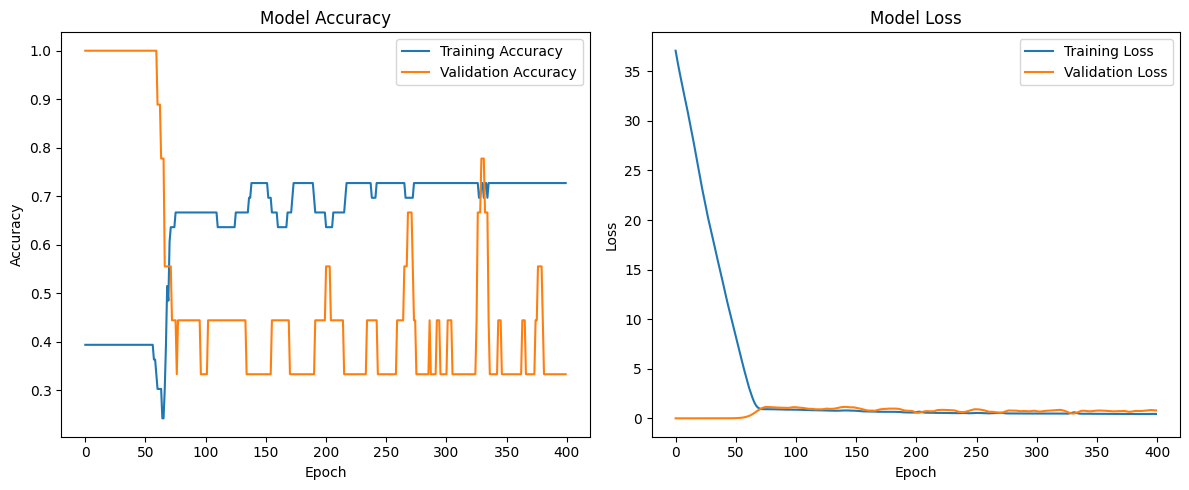

In [150]:

import matplotlib.pyplot as plt

# Save the model in a format suitable for TensorFlow Lite
model.save('model.h5')

# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [23]:
# model = tf.keras.models.load_model('D:\pose_detection\pose-detection\ModelTraining\model.h5')

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\2001l\AppData\Local\Temp\ipykernel_10480\2340584429.py:1: SyntaxWarning: invalid escape sequence '\p'
  model = tf.keras.models.load_model('D:\pose_detection\pose-detection\ModelTraining\model.h5')


In [111]:
def landmarks_from_squating_images(input_dir,X,Y):
    for file in os.listdir(input_dir):
        img_path = os.path.join(input_dir, file)
        
        # Check if the file is an image
        if os.path.isfile(img_path) and file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            img = Image.open(img_path)
            img = tf.image.resize_with_pad(np.expand_dims(img,axis=0), 192, 192)
            input_image = tf.cast(img, dtype=tf.float32)

            # Setup input and output
            input_details = interpreter.get_input_details()
            output_details = interpreter.get_output_details()

            #make predictions
            interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
            interpreter.invoke()
            keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
            landmarks = keypoints_with_scores

            X.append(landmarks)
            Y.append(1)
    return X,Y

def landmarks_from_standing_images(input_dir,X,Y):
    for file in os.listdir(input_dir):
        img_path = os.path.join(input_dir, file)
        
        # Check if the file is an image
        if os.path.isfile(img_path) and file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            img = Image.open(img_path)
            img = tf.image.resize_with_pad(np.expand_dims(img,axis=0), 192, 192)
            input_image = tf.cast(img, dtype=tf.float32)

            # Setup input and output
            input_details = interpreter.get_input_details()
            output_details = interpreter.get_output_details()

            #make predictions
            interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
            interpreter.invoke()
            keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
            landmarks = keypoints_with_scores

            X.append(landmarks)
            Y.append(0)
    return X,Y

def image_prediction(image_path):
    img = Image.open(image_path)
    img = tf.image.resize_with_pad(np.expand_dims(img,axis=0), 192, 192)
    input_image = tf.cast(img, dtype=tf.float32)
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    #make predictions
    interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
    interpreter.invoke()
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
    landmarks = keypoints_with_scores
    return landmarks[0][0]



In [112]:
test_X,test_Y = landmarks_from_squating_images('test images/sit',[],[])
test_X,test_Y = landmarks_from_standing_images('test images/stand',test_X,test_Y)
print(len(test_X))

9


In [113]:
columns = [f"{i}_x" for i in range(1, 18) if i in (7,6,13,12,15,14,17,16)] + [f"{i}_y" for i in range(1, 18) if i in (7,6,13,12,15,14,17,16)] + ['Y']

In [114]:
test_columns = columns

df_test = pd.DataFrame(columns=test_columns)
y = 0
for entry in test_X:
    new_row = {col: None for col in columns}
    x = 0
    for x in range(1,18):
        if x in (7,6,13,12,15,14,17,16):
            xName = str(x) + '_x'
            yName = str(x) + '_y'
            new_row[xName] = entry[0][0][x-1][0]
            new_row[yName] = entry[0][0][x-1][1]
        x = x+1
    new_row['Y'] = test_Y[y]
    y = y+1
    df_test = pd.concat([df_test, pd.DataFrame([new_row])], ignore_index=True)

df_test_angles = angle_dataframe(df_test)
print(df_test_angles)

   right_upper  left_upper  right_bottom  left_bottom  Y
0    50.092130   48.862599     48.226499    54.869903  1
1    54.603440   58.999916     71.874070    73.262265  1
2   103.368161   89.436110    112.362106    99.407210  1
3    80.981508   92.165252     91.695080    95.849710  1
4   179.135893  169.638503    177.883198   168.604303  0
5   170.373016  162.528502    159.250169   160.690936  0
6   160.826153  164.281997    174.434217   172.860847  0
7   167.987044  168.554225    176.456867   169.487097  0
8   179.015712  178.631330    173.745855   174.081347  0


C:\Users\2001l\AppData\Local\Temp\ipykernel_33168\3868774676.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test = pd.concat([df_test, pd.DataFrame([new_row])], ignore_index=True)
C:\Users\2001l\AppData\Local\Temp\ipykernel_33168\2825275131.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_angles = pd.concat([df_angles, pd.DataFrame(angles_list)], ignore_index=True)


In [115]:
x = df_test_angles[[cols for cols in df_test_angles.columns if cols not in ('Y')]]
y = df_test_angles[['Y']]
print(y)

   Y
0  1
1  1
2  1
3  1
4  0
5  0
6  0
7  0
8  0


In [151]:
predictions = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [152]:
predictions

array([[0.33987996],
       [0.33201253],
       [0.8244604 ],
       [0.22649896],
       [0.09967045],
       [0.12211653],
       [0.0864043 ],
       [0.09104864],
       [0.1069122 ]], dtype=float32)